# Introduction/Business problem

New York City's demographics show that it is a large and ethnically diverse metropolis, since many people from different cultural atmospheres have brought their families and dreams here, calling it home. It has been a center for trade and economic growth and it is the largest city in the United States. Over the last decade the city has been growing faster than the region. Throughout its history, New York City has been a major point of entry for immigrants; the term "melting pot" was coined to describe densely populated immigrant neighborhoods on the Lower East Side. And with it's diverse culture , comes diverse food items. There are many restaurants in New York City, each beloning to different categories like Chinese, Italian, French etc.

So as part of this project , we will list and visualize all major parts of New York City that has great Italian restaurants.
Additionally, we will attempt to answer the questions:
- Where should we open an Italian restaurant to have the best chance of being successful?
- Where should we go in New York City if we want great Italian food?

What are all the factors we have to take into account:
- Competition in particular location
- Population
- Venue rating, tips, and likes

Finally, who would be interested in this project:
- An investor, who wants to open a new Italian restaurant, or a food chain owner, who wants to expand his business in the great city of New York
- Regular turist, who wants a great Italian meal while visiting New York City

# Data

In order to answer Project questions, data on New York City population, neighborhoods, boroughs to include boundaries, latitude, longitude, restaurants, and restaurant ratings, likes and tips are required:
- New York Population Data which will be used to get to know about the population acroos the boroughs  
    data source: https://en.wikipedia.org/wiki/New_York_City
- New York Neighborhood Data which will be used to get to know about the various neighborhoods and boroughs, latitudes, and longitudes  
    data source: https://cocl.us/new_york_dataset
- Geo-spacial data of the New York to get a better understanding of the neighborhoods in it and their corresponding locations in the Folium map  
    data source: https://data.cityofnewyork.us/City-Government/Borough-Boundaries/tqmj-j8zm
- All data related to locations and quality of Italian restaurants will be obtained via the FourSquare API utilized via the Request library in Python  
    data source: https://foursquare.com/

# Methodology

- New York neighborhood data from https://cocl.us/new_york_dataset
- New York population data from https://en.wikipedia.org/wiki/New_York_City
- Borough Boundaries data from https://data.cityofnewyork.us/City-Government/Borough-Boundaries/tqmj-j8zm
- Italian Cuisine related data from Foursquare
- Filter the data for the required data acquired from Foursqaure which is only about Italian Cuisine.
- Acquire the tips, likes and rating of every restaurant in the neighborhood of New York.
- Visualize the findings using Matplot lib and Folium for better understanding.

# Exploratory data analysis

Import and load libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from bs4 import BeautifulSoup # library for data scraping
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.4.1               |             py_0          26 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ------------------------------------------------------------
                       

Download, load and transform data into Pandas dataframe

Download and scrape data on New York population

In [2]:
response_obj = requests.get('https://en.wikipedia.org/wiki/New_York_City').text
soup = BeautifulSoup(response_obj,'lxml')
Population_Table = soup.find('table', {'class':'wikitable sortable'})
### preparation of the table
rows = Population_Table.select("tbody > tr")[3:8]
boroughs = []
for row in rows:
    borough = {}
    tds = row.select('td')
    borough['Borough'] = tds[0].text.strip()
    borough['County'] = tds[1].text.strip()
    borough['Population'] = int(tds[2].text.strip().replace(",",""))
    borough['Gdp_billions'] = float(tds[3].text.strip().replace(",",""))
    borough['Gdp_per_capita'] = float(tds[4].text.strip().replace(",",""))
    borough['Land_sqm'] = float(tds[5].text.strip().replace(",",""))
    borough['Land_sqkm'] = float(tds[6].text.strip().replace(",",""))
    borough['Persons_sqm'] = int(tds[7].text.strip().replace(",",""))
    borough['Persons_sqkm'] = int(tds[8].text.strip().replace(",",""))
    
    boroughs.append(borough)
# instantiate the dataframe
ny_population = pd.DataFrame(boroughs, columns=['Borough', 'Population', 'Persons_sqkm']) 

Examine resulting tadaframe

In [3]:
ny_population.head()

Borough  Population  Persons_sqkm
0      The Bronx     1432132         13231
1       Brooklyn     2582830         14649
2      Manhattan     1628701         27826
3         Queens     2278906          8354
4  Staten Island      476179          3132

Let's visualize data

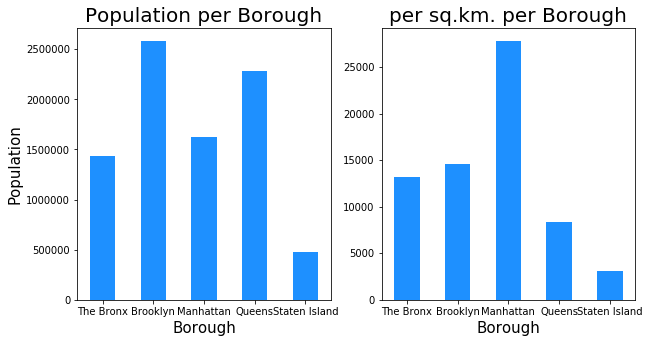

In [4]:
clr = "dodgerblue"

ax = plt.subplot(1, 2, 1)
ny_population.plot.bar(x='Borough', y='Population', figsize=(10,5), color=clr, legend=False, ax=ax)
plt.title('Population per Borough', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('Population',fontsize = 15)
plt.xticks(rotation = 'horizontal')

ax = plt.subplot(1, 2, 2)
ny_population.plot.bar(x='Borough', y='Persons_sqkm', figsize=(10,5), color=clr, legend=False, ax=ax)
plt.title('per sq.km. per Borough', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.xticks(rotation = 'horizontal')

plt.show()

We can see that Brooklyn has highest population per borough, while Manhattan has highest density

Now, let's download and scrape data on New York neighborhoods, boroughs to include boundaries, latitude, longitude, restaurants, and restaurant ratings, likes and tips

In [5]:
url='https://cocl.us/new_york_dataset'
resp=requests.get(url).json()
# all data is present in features label
features=resp['features']
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
# instantiate the dataframe
ny_data = pd.DataFrame(columns=column_names)
for data in features:
    borough = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    ny_data = ny_data.append({'Borough': borough,
                              'Neighborhood': neighborhood_name,
                              'Latitude': neighborhood_lat,
                              'Longitude': neighborhood_lon}, ignore_index=True)

Examine resulting dataframe

In [6]:
ny_data.head()

Borough Neighborhood   Latitude  Longitude
0   Bronx    Wakefield  40.894705 -73.847201
1   Bronx   Co-op City  40.874294 -73.829939
2   Bronx  Eastchester  40.887556 -73.827806
3   Bronx    Fieldston  40.895437 -73.905643
4   Bronx    Riverdale  40.890834 -73.912585

And make sure that the dataset has all 5 boroughs and 306 neighborhoods

In [7]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(ny_data['Borough'].unique()),
        ny_data.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


Now that we have our initial data, lets start analyzing it 

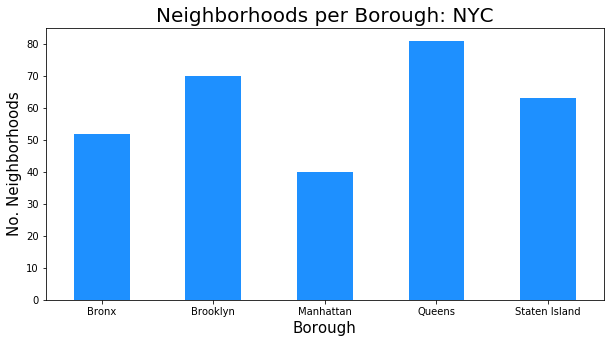

In [8]:
clr = "dodgerblue"
ny_data.groupby('Borough')['Neighborhood'].count().plot.bar(figsize=(10,5), color=clr)
plt.title('Neighborhoods per Borough: NYC', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No. Neighborhoods',fontsize = 15)
plt.xticks(rotation = 'horizontal')
plt.show()

We can see that Queens has the highest, while Manhattan has the least number of neighborhoods in all five buroughs

Lets analyze further and see how many Italian restaurants there are in each neighborhood and burough and graph the results

In [9]:
# define Foursquare credentials and version
CLIENT_ID = 'FXT43O1LHP1PXBCFYHLPGSJT5OUWTFUAY2Y0STIYQDNKISWY' # your Foursquare ID
CLIENT_SECRET = 'PKYFNY5APMHEXN2GS3Y14FRTFPITUYQ4XFUUQ1MH1F3RJD21' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

Define function to find Italian restaurants in each neighborhood and burough through foursquare api

In [10]:
def get_venues(lat,lng):
    #set variables
    radius=400
    LIMIT=100
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
    column_names=['ID','Name','Category']
    venue = pd.DataFrame(venue_details,columns=column_names)
    return(venue)

Prepare neighborhood list that contains Italian resturants

In [12]:
column_names=['Borough', 'Neighborhood', 'ID','Name']
italian_rest_ny=pd.DataFrame(columns=column_names)

for row in ny_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    italian_resturants=venues[venues['Category']=='Italian Restaurant']   
    for resturant_detail in italian_resturants.values.tolist():
        id, name , category=resturant_detail
        italian_rest_ny = italian_rest_ny.append({'Borough': Borough,
                                                  'Neighborhood': Neighborhood, 
                                                  'ID': id,
                                                  'Name' : name
                                                 }, ignore_index=True)

Examine the resulting dataframe

In [13]:
italian_rest_ny.head()

Borough    Neighborhood                        ID                       Name
0   Bronx        Woodlawn  511edb6de4b0d58346fd272d     Patrizia's Of Woodlawn
1   Bronx  Pelham Parkway  4bf96ae65317a593d837017f                     Enzo's
2   Bronx  Pelham Parkway  4b47f069f964a5208c4426e3                Pasta Pasta
3   Bronx     City Island  4514ed4df964a520e5391fe3  Artie's Steak and Seafood
4   Bronx     Morris Park  4b10591af964a5205f6e23e3                 Patricia's

In [14]:
italian_rest_ny.shape

(210, 4)

Save data to csv file due to a limitation on Foursquare api calls

In [15]:
italian_rest_ny.to_csv('italian_rest_ny.csv', index=False)
italian_rest_ny = pd.read_csv('italian_rest_ny.csv')
italian_rest_ny.shape

(210, 4)

Graph the results

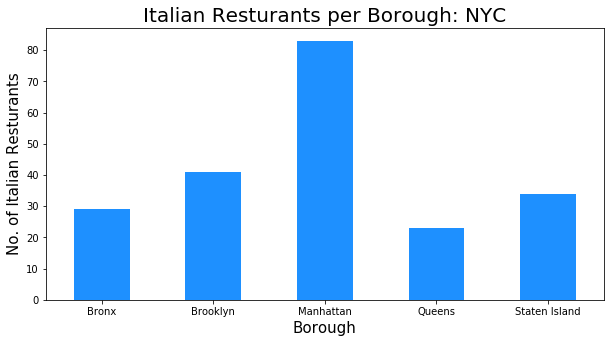

In [16]:
italian_rest_ny.groupby('Borough')['ID'].count().plot.bar(figsize=(10,5), color = clr)
plt.title('Italian Resturants per Borough: NYC', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No. of Italian Resturants', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.show()

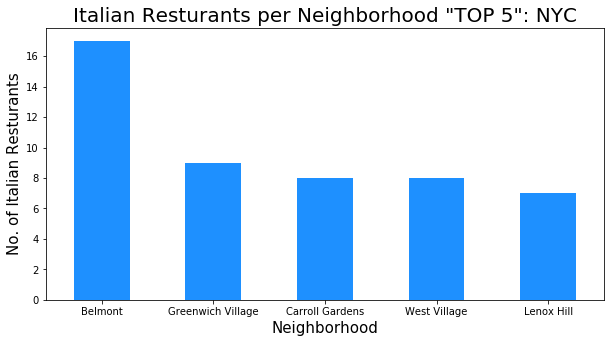

In [17]:
NOofNeigh = 5 # lets display 5 neighborhoods having highest number of Italian restaurants
italian_rest_ny.groupby('Neighborhood')['ID'].count().nlargest(NOofNeigh).plot.bar(figsize=(10,5), color=clr)
plt.title('Italian Resturants per Neighborhood "TOP 5": NYC', fontsize = 20)
plt.xlabel('Neighborhood', fontsize = 15)
plt.ylabel('No. of Italian Resturants', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.show()

We see that although Manhattan has the least number of nieghborhoods, it does have the highest number of Italian restaurants  
Additionally, we see how many restaurants the top 5 neighborhoods have  

Let's explore Belmont, neighborhood having the highest number of Italian restaurants

In [18]:
italian_rest_ny[italian_rest_ny['Neighborhood']=='Belmont']

Borough Neighborhood                        ID  \
5    Bronx      Belmont  4acf80aef964a52025d420e3   
6    Bronx      Belmont  4af71916f964a520cf0522e3   
7    Bronx      Belmont  59050f51b23dfa5f6649e678   
8    Bronx      Belmont  4c9b9e7b9c663704b90463fd   
9    Bronx      Belmont  4bb6470cef159c7465b275f7   
10   Bronx      Belmont  4b5514c4f964a5207cda27e3   
11   Bronx      Belmont  4af0fa29f964a52060e021e3   
12   Bronx      Belmont  4aa425bef964a5208e4520e3   
13   Bronx      Belmont  4c79d294278eb713f6a05580   
14   Bronx      Belmont  4b5a4c8ff964a52049bb28e3   
15   Bronx      Belmont  4aa193d5f964a520124120e3   
16   Bronx      Belmont  4b5bc595f964a520431529e3   
17   Bronx      Belmont  4cb0d382ef1b370419643e00   
18   Bronx      Belmont  4bc22a22920eb713bcc51b2c   
19   Bronx      Belmont  4bc67f1104e8b713a833362d   
20   Bronx      Belmont  53ff939c498e6b601dfa3979   
21   Bronx      Belmont  44941e38f964a52081341fe3   

                                                 Name  
5                                 Tino's Delicatessen  
6   Michaelangelo's Coal Fired Brick Oven Pizza Re...  
7                                Arthur Avenue Fiasco  
8                                  Gerbasi Ristorante  
9                                 Calabria Pork Store  
10                                             Enzo's  
11                                Antonio's Trattoria  
12                              Dominick's Restaurant  
13                                    Cafe al Mercato  
14                                Emilia's Restaurant  
15                      Mario's Restaurant & Catering  
16                              Pasquale Riggaletto's  
17              David Greco's Arthur Avenue Trattoria  
18                                         Tra Di Noi  
19  Ann & Tony's - An Original Arthur Avenue Resta...  
20                             San Gennaro Ristorante  
21                                 Arthur Avenue Cafe

Although Manhattan has the highest number of Italian restaurantsis as borough, Belmont actually located in the borough of Bronx

Let's find the rating, likes and tips of each Italian restaurant in NYC  
Define function to find each restaurants rating, tips and likes through foursquare api

In [19]:
def get_venue_details(venue_id):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    # get all the data
    results = requests.get(url).json()
    # print(results)
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
    column_names=['ID','Name','Likes','Rating','Tips']
    details = pd.DataFrame(venue_details,columns=column_names)
    return details

In [22]:
column_names=['Borough', 'Neighborhood', 'ID', 'Name', 'Likes', 'Rating', 'Tips']
italian_rest_stats_ny=pd.DataFrame(columns=column_names)
#count=1
for row in italian_rest_ny.values.tolist():
    Borough, Neighborhood, ID, Name=row
    try:
        venue_details=get_venue_details(ID)
        #print(venue_details)
        id, name, likes, rating, tips=venue_details.values.tolist()[0]
    except IndexError:
        # print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        # recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    # print('(',count,'/',len(italian_rest_ny),')','processed')
    italian_rest_stats_ny = italian_rest_stats_ny.append({'Borough': Borough,
                                                          'Neighborhood': Neighborhood, 
                                                          'ID': id,
                                                          'Name' : name,
                                                          'Likes' : likes,
                                                          'Rating' : rating,
                                                          'Tips' : tips
                                                          }, ignore_index=True)
    #count+=1

Examine the resulting dataframe

In [24]:
italian_rest_stats_ny.shape

(210, 7)

Save data to csv file due to a limitation on Foursquare api calls

In [85]:
#italian_rest_stats_ny.to_csv('italian_rest_stats_ny.csv', index=False)
italian_rest_stats_ny = pd.read_csv('italian_rest_stats_ny.csv')
italian_rest_stats_ny.shape

(210, 7)

In [26]:
italian_rest_stats_ny.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
Borough         210 non-null object
Neighborhood    210 non-null object
ID              210 non-null object
Name            210 non-null object
Likes           210 non-null int64
Rating          210 non-null float64
Tips            210 non-null int64
dtypes: float64(1), int64(2), object(4)
memory usage: 11.6+ KB


In [27]:
italian_rest_stats_ny.describe()

Likes      Rating         Tips
count   210.000000  210.000000   210.000000
mean    146.709524    7.381429    56.804762
std     299.366454    2.176228   122.457277
min       0.000000    0.000000     0.000000
25%      13.250000    7.300000     7.000000
50%      35.000000    8.000000    16.500000
75%     107.250000    8.500000    42.500000
max    2491.000000    9.500000  1136.000000

Let's examine resturant which has maximum Likes

In [28]:
italian_rest_stats_ny.iloc[italian_rest_stats_ny['Likes'].idxmax()]

Borough                        Manhattan
Neighborhood                Little Italy
ID              4cc6222106c25481d7a4a047
Name                 Rubirosa Ristorante
Likes                               2491
Rating                               9.3
Tips                                 824
Name: 113, dtype: object

Let's examine resturant which has maximum Rating

In [29]:
italian_rest_stats_ny.iloc[italian_rest_stats_ny['Rating'].idxmax()]

Borough                         Brooklyn
Neighborhood                    Bushwick
ID              5a98aed16a59506d7a60d67c
Name                          Carmenta’s
Likes                                 56
Rating                               9.5
Tips                                  21
Name: 38, dtype: object

Let's examine resturant which has maximum number of Tips

In [30]:
italian_rest_stats_ny.iloc[italian_rest_stats_ny['Tips'].idxmax()]

Borough                    Staten Island
Neighborhood               West Brighton
ID              4b5b58dbf964a52088f628e3
Name                        Panini Grill
Likes                                 21
Rating                               8.6
Tips                                1136
Name: 153, dtype: object

Let's find average resturants rating for each neighborhood and display top 5

In [31]:
ny_neighborhood_stats=italian_rest_stats_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
ny_neighborhood_stats.columns=['Neighborhood','Average Rating']
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head()

Neighborhood  Average Rating
12          Bushwick             9.5
11       Boerum Hill             9.1
52      Little Italy             9.0
44  Hamilton Heights             9.0
84           Tribeca             8.9

And the same for each borough

In [32]:
ny_borough_stats=italian_rest_stats_ny.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
ny_borough_stats.columns=['Borough','Average Rating']
ny_borough_stats.sort_values(['Average Rating'],ascending=False).head()

Borough  Average Rating
2      Manhattan        8.275904
0          Bronx        7.872414
1       Brooklyn        7.765854
3         Queens        6.791304
4  Staten Island        4.714706

Graph results

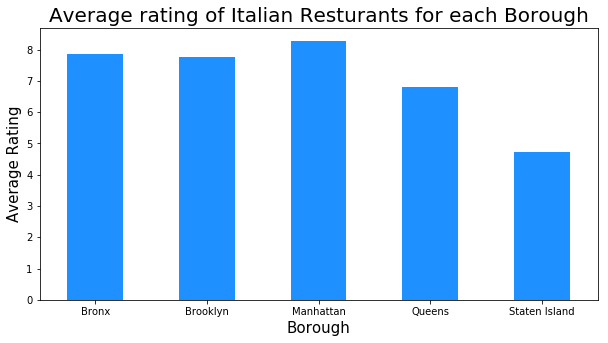

In [33]:
italian_rest_stats_ny.groupby('Borough').mean()['Rating'].plot.bar(figsize=(10,5), color=clr)
plt.title('Average rating of Italian Resturants for each Borough', fontsize=20)
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('Average Rating', fontsize=15)
plt.xticks(rotation = 'horizontal')
plt.show()

Manhattan has the highest average rating for Italian restaurants, followed by Bronx and Brooklyn

We will consider all the neighborhoods with average rating greater or equal 8.5 to visualize on map

In [34]:
ny_neighborhood_stats=ny_neighborhood_stats[ny_neighborhood_stats['Average Rating']>=8.5]
ny_neighborhood_stats=pd.merge(ny_neighborhood_stats, ny_data, on='Neighborhood')
ny_neighborhood_stats=ny_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]
ny_neighborhood_stats

Borough               Neighborhood   Latitude  Longitude  Average Rating
0    Brooklyn                Boerum Hill  40.685683 -73.983748        9.100000
1    Brooklyn                   Bushwick  40.698116 -73.925258        9.500000
2   Manhattan              Carnegie Hill  40.782683 -73.953256        8.500000
3    Brooklyn               Clinton Hill  40.693229 -73.967843        8.650000
4      Queens                     Corona  40.742382 -73.856825        8.700000
5   Manhattan          Greenwich Village  40.726933 -73.999914        8.777778
6   Manhattan           Hamilton Heights  40.823604 -73.949688        9.000000
7   Manhattan               Little Italy  40.719324 -73.997305        9.000000
8   Manhattan            Lower East Side  40.717807 -73.980890        8.500000
9       Bronx                Morris Park  40.847549 -73.850402        8.600000
10   Brooklyn                 North Side  40.714823 -73.958809        8.800000
11      Bronx             Pelham Gardens  40.862966 -73.841612        8.500000
12   Brooklyn  Prospect Lefferts Gardens  40.658420 -73.954899        8.500000
13     Queens                  Rego Park  40.728974 -73.857827        8.500000
14  Manhattan                       Soho  40.722184 -74.000657        8.733333
15  Manhattan                    Tribeca  40.721522 -74.010683        8.900000
16  Manhattan         Washington Heights  40.851903 -73.936900        8.500000

Lets add a new field to dataframe for labeling purpose

In [35]:
ny_neighborhood_stats['Label']=ny_neighborhood_stats['Neighborhood']+', '+ny_neighborhood_stats['Borough']+' ('+ny_neighborhood_stats['Average Rating'].map(str)+')'

Define a function to get the geocodes i.e latitude and longitude of a given location using geopy

In [36]:
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude

Let's create a map

In [38]:
# create map 
ny_map = folium.Map(location=geo_location('New York'), zoom_start=12)
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()
# loop through the neighbohoods and add each to the incidents feature group
for lat, lng, in ny_neighborhood_stats[['Latitude','Longitude']].values:
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )
# add pop-up text to each marker on the map
for lat, lng, label in ny_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)        
# add incidents to map and display it
ny_map.add_child(incidents)

Now that we have visualized the Neighborhoods, let's visualize Boroughs based on average rating

In [66]:
# create map
ny_map = folium.Map(location=geo_location('New York'), zoom_start=10)
ny_geo = 'https://raw.githubusercontent.com/gedask82/Coursera_Capstone/master/BoroughBoundaries.geojson'
ny_map.choropleth(
    geo_data=ny_geo,
    data=ny_borough_stats,
    columns=['Borough', 'Average Rating'],
    key_on='feature.properties.boro_name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Average Rating'
)
# display map
ny_map

Combine both maps for better visualization

In [67]:
# create map
ny_map = folium.Map(location=geo_location('New York'), zoom_start=10)
ny_geo = 'https://raw.githubusercontent.com/gedask82/Coursera_Capstone/master/BoroughBoundaries.geojson'
ny_map.choropleth(
    geo_data=ny_geo,
    data=ny_borough_stats,
    columns=['Borough', 'Average Rating'],
    key_on='feature.properties.boro_name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Average Rating'
)
incidents = folium.map.FeatureGroup()
# loop through the neighbohoods and add each to the incidents feature group
for lat, lng, in ny_neighborhood_stats[['Latitude','Longitude']].values:
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )
# add pop-up text to each marker on the map
for lat, lng, label in ny_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)        
# add incidents to map and display it
ny_map.add_child(incidents)

Finally, let's map top 3 ranked Italian restaurnats accross the City for whose who wants the best Italian cuisine

Let's prepare data, sort restaurants based on rating

In [105]:
italian_top_rest_ny=italian_rest_stats_ny.sort_values(['Rating'],ascending=False).head(3)
italian_top_rest_ny

Borough  Neighborhood                        ID                 Name  \
38    Brooklyn      Bushwick  5a98aed16a59506d7a60d67c           Carmenta’s   
50    Brooklyn   Fort Greene  5a00f3538496ca58fd9e2856   Evelina Restaurant   
113  Manhattan  Little Italy  4cc6222106c25481d7a4a047  Rubirosa Ristorante   

     Likes  Rating  Tips  
38      56     9.5    21  
50     190     9.4    34  
113   2491     9.3   824

Add longitude, latitude and label

In [106]:
italian_top_rest_ny=pd.merge(italian_top_rest_ny, ny_data, on=['Neighborhood', 'Borough'])
italian_top_rest_ny['Label']=italian_top_rest_ny['Name']+' ('+italian_top_rest_ny['Rating'].map(str)+')'+' '+italian_top_rest_ny['Neighborhood']+', '+italian_top_rest_ny['Borough']
italian_top_rest_ny

Borough  Neighborhood                        ID                 Name  \
0   Brooklyn      Bushwick  5a98aed16a59506d7a60d67c           Carmenta’s   
1   Brooklyn   Fort Greene  5a00f3538496ca58fd9e2856   Evelina Restaurant   
2  Manhattan  Little Italy  4cc6222106c25481d7a4a047  Rubirosa Ristorante   

   Likes  Rating  Tips   Latitude  Longitude  \
0     56     9.5    21  40.698116 -73.925258   
1    190     9.4    34  40.688527 -73.972906   
2   2491     9.3   824  40.719324 -73.997305   

                                               Label  
0                Carmenta’s (9.5) Bushwick, Brooklyn  
1     Evelina Restaurant (9.4) Fort Greene, Brooklyn  
2  Rubirosa Ristorante (9.3) Little Italy, Manhattan

Visualize on a map

In [107]:
# create map 
ny_map = folium.Map(location=geo_location('New York'), zoom_start=12)
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()
# loop through the neighbohoods and add each to the incidents feature group
for lat, lng, in italian_top_rest_ny[['Latitude','Longitude']].values:
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )
# add pop-up text to each marker on the map
for lat, lng, label in italian_top_rest_ny[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)        
# add incidents to map and display it
ny_map.add_child(incidents)

# Results

Brooklyn and Queens are most populated, while Manhattan most dense boroughs in New York City. Manhattan and Bronx have the best rated Italian restaurants on average. Queens and Bronx have the least amount of Italian restaurants per borough, however Belmont in Bronx is the neighborhood with the most Italian restaurants per neighborhood. Despite Manhattan having the least number of neighborhoods, it has the most Italian restaurants per borough, folowed by Brooklyn. The best restaurant based on likes is in Little Italy, Manhattan, best restaurant based and rating in Bushwick, Brooklyn. 

# Conclusion

Based on information, I would state that Manhattan and Brooklyn are the best locations for Italian cuisine in New York.
To have a best shot of success, I would open an Italian restaurant in Bronx, excluding Belmont neighborhood (as it has highest number of restaurants per neighborhood). Bronx has multiple neighborhoods with average rating exceeding 7.87, second highest in the City, and has least number of Italian restaurants, making competition easier thab in other boroughs.
Finally, for the best Italian meal, top 3 ranked restaurants are: Carmenta’s (9.5) Bushwick, Brooklyn; Evelina Restaurant (9.4) Fort Greene, Brooklyn; Rubirosa Ristorante (9.3) Little Italy, Manhattan
All of the above analysis is dependand on the accuracy of Forsquare data and ranked purely on basis of rating of restaurants.